In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time
import numpy as np

np.random.seed(42)
torch.manual_seed(42)

device = torch.device(device='cuda' if torch.cuda.is_available() else 'cpu')


def reset_weights(m):
    if isinstance(m, nn.Linear):
        m.reset_parameters()

In [2]:
# 加载 MNIST 数据集
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor())

In [6]:
# 超参数设置
input_size = 784  # MNIST 图像大小为 28x28，展平后为 784
num_classes = 10  # 类别数
num_epochs = 45
batch_size = 128
learning_rate = 5e-3
momentum = 0.5

# 数据加载器
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size, shuffle=False)

model = nn.Linear(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()

optimizers = {
    'SGD': torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, nesterov=True),
    'Adam': torch.optim.Adam(model.parameters(), lr=learning_rate),
    'Adagrad': torch.optim.Adagrad(model.parameters(), lr=learning_rate)
}

training_losses = {name: [] for name in optimizers.keys()}
for name, optimizer in optimizers.items():
    # 训练模型
    print(f"\nTraining with {name} optimizer")
    model.apply(reset_weights)
    for epoch in range(num_epochs):
        model.train()
        for i, (images, labels) in enumerate(train_loader):
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)

            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, labels)
            training_losses[name].append(loss.item())
            # 反向传播和优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Training with SGD optimizer
Epoch [1/45], Loss: 0.9502
Epoch [2/45], Loss: 0.6379
Epoch [3/45], Loss: 0.6391
Epoch [4/45], Loss: 0.5489
Epoch [5/45], Loss: 0.4231
Epoch [6/45], Loss: 0.3205
Epoch [7/45], Loss: 0.5386
Epoch [8/45], Loss: 0.5723
Epoch [9/45], Loss: 0.5519
Epoch [10/45], Loss: 0.4155
Epoch [11/45], Loss: 0.5766
Epoch [12/45], Loss: 0.3969
Epoch [13/45], Loss: 0.5436
Epoch [14/45], Loss: 0.3395
Epoch [15/45], Loss: 0.3054
Epoch [16/45], Loss: 0.4119
Epoch [17/45], Loss: 0.3952
Epoch [18/45], Loss: 0.5485
Epoch [19/45], Loss: 0.3684
Epoch [20/45], Loss: 0.2881
Epoch [21/45], Loss: 0.2838
Epoch [22/45], Loss: 0.3698
Epoch [23/45], Loss: 0.3242
Epoch [24/45], Loss: 0.3601
Epoch [25/45], Loss: 0.3856
Epoch [26/45], Loss: 0.3005
Epoch [27/45], Loss: 0.4589
Epoch [28/45], Loss: 0.2640
Epoch [29/45], Loss: 0.2555
Epoch [30/45], Loss: 0.2262
Epoch [31/45], Loss: 0.4555
Epoch [32/45], Loss: 0.2705
Epoch [33/45], Loss: 0.3656
Epoch [34/45], Loss: 0.2884
Epoch [35/45], Loss: 0.3740


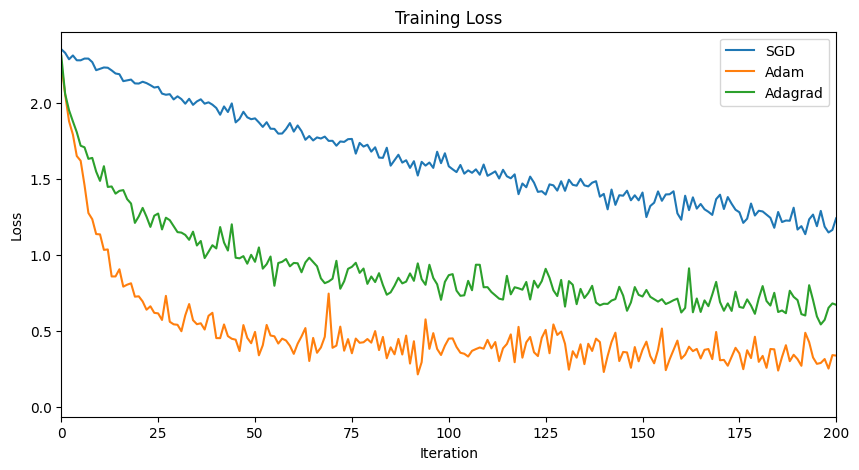

In [7]:
plt.figure(figsize=(10, 5))
for name, losses in training_losses.items():
    plt.plot(losses, label=name)
plt.title('Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0, 200)
plt.show()